Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Juan Mario Sosa Romo"

---

<div class="alert alert-success">

# Objetivos

El propósito de este ejercicio es que  compares el rendimiento de diversos algoritmos de agrupamiento

In [2]:
# Bibliotecas básicas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from macti.eval import *

In [3]:
quiz = Quiz('1','mdp')

In [4]:
# Conjunto de datos Iris
from sklearn.datasets import load_iris
iris = load_iris()
iris.data.shape, np.unique(iris.target), iris.target_names, iris.feature_names

((150, 4),
 array([0, 1, 2]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [5]:
# Conservamos solamente las tres primeras columnas
datos = iris.data[:,:3]

In [6]:
# Aplica "normalize" al conjunto de datos
from sklearn.preprocessing import normalize
datos = normalize(datos)
datos = pd.DataFrame(datos,columns=iris.feature_names[:3])
datos.head(2)

,sepal length (cm),sepal width (cm),petal length (cm)
0,0.804172,0.551883,0.220753
1,0.828606,0.507310,0.236745


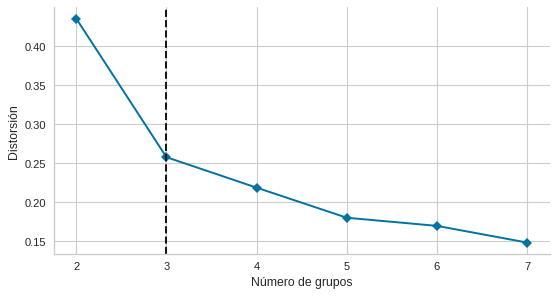

In [7]:
# Obtén la recomendación respecto al número de grupos con la gráfica del codo
# Con el valor 42 para el parámetro de replicabilidad y valores de k=(2,8)
# Instalar yellowbrick, de ser necesario descomenta la siguiente línea
# !pip install yellowbrick
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
plt.figure(figsize=(8, 4))
vis = KElbowVisualizer(KMeans(random_state=42),k=(2,8),timings=False)
vis.fit(datos)
plt.xlabel('Número de grupos')
plt.ylabel('Distorsión')
plt.show()

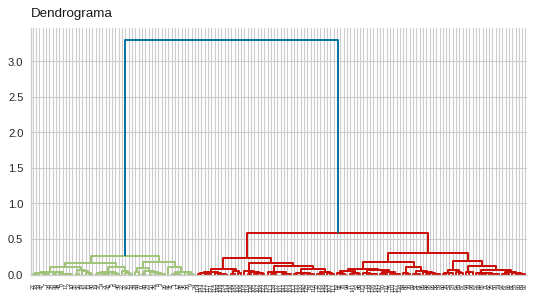

In [8]:
# Obtén la recomendación respecto al número de grupos con el dendrograma
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 4))
plt.title("Dendrograma")
dend = shc.dendrogram(shc.linkage(datos,method='ward'))

Text(0.5, 0, 'n_clusters')

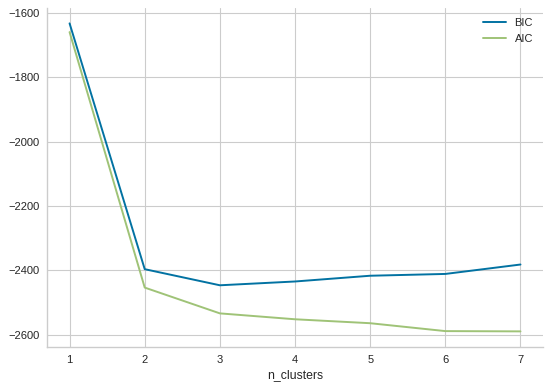

In [9]:
# Obtén la recomendación respecto al número de grupos con los criterios
# AIC y BIC con valores del número de grupos (1,8) y 42 para replicabilidad
from sklearn.mixture import GaussianMixture
n_clusters = np.arange(1,8)
models = [GaussianMixture(n, covariance_type='full',random_state=42).fit(datos) for n in n_clusters]
plt.plot(n_clusters, [m.bic(datos) for m in models], label='BIC')
plt.plot(n_clusters, [m.aic(datos) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_clusters')

In [10]:
# De acuerdo a tus resultados, indica el número de grupos a obtener
num_grupos = 3
print(num_grupos)

3


In [11]:
quiz.eval_numeric('1', num_grupos)

――――――――――――――――――――――――――――――――――――――――
1 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [12]:
# Agrupa con k-medias y el número de grupos que indicaste, 42 para replicabilidad
# y obtén el valor de la métrica silhouette con el mismo valor para replicabilidad
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
km = KMeans(n_clusters=3,random_state=42)
silhouette_km = silhouette_score(datos,km.fit_predict(datos),random_state=42)
silhouette_km = np.round(silhouette_km, decimals=6) # redondea a 6 decimales, NO lo modifiques
print(silhouette_km)

0.585056


In [13]:
quiz.eval_numeric('2', silhouette_km)

――――――――――――――――――――――――――――――――――――――――
2 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [14]:
# Aplica agrupamiento aglomerativo con el número de grupos que indicaste
# y obtén el valor de la métrica silhouette con el valor 42 para replicabilidad
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
silhouette_ac = silhouette_score(datos,ac.fit_predict(datos))
silhouette_ac = np.round(silhouette_ac, decimals=6) # redondea a 6 decimales, NO lo modifiques
print(silhouette_ac)

0.564169


In [15]:
quiz.eval_numeric('3', silhouette_ac)

――――――――――――――――――――――――――――――――――――――――
3 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [16]:
# Agrupa con GMM y el número de grupos que indicaste, 42 para replicabilidad
# y obtén el valor de la métrica silhouette con el mismo valor para replicabilidad
gmm = GaussianMixture(3,random_state=42)
silhouette_gmm = silhouette_score(datos, gmm.fit_predict(datos))
silhouette_gmm = np.round(silhouette_gmm, decimals=6) # redondea a 6 decimales, NO lo modifiques
print(silhouette_gmm)

0.585056


In [17]:
quiz.eval_numeric('4', silhouette_gmm)

――――――――――――――――――――――――――――――――――――――――
4 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――
